# PHAS0007 Computing Unit 4: Linear regression task


## Hooke's Law: Determining the spring constant

In this experiment, we will progressively load masses, $m$, onto a spring and record its extension, $x$. By graphing mass against extension, we can calculate k.

$$F = k x$$

(where $F = m g$)


Full Precision

Unweighted Fit
m =  0.08172727272727331 ± 0.0012770489397401603 mm/g
c =    617.9199999999998 ± 0.1584776057213403    mm

Weighted Fit
m =  0.08172727272727331 ± 0.002752409412815904  mm/g
c =    617.9199999999998 ± 0.3415650255319868    mm


Appropriate Precision

Unweighted Fit
m = 0.0817 ± 0.0013 mm/g
c = 617.92 ± 0.16   mm

Weighted Fit
m = 0.0817 ± 0.0028 mm/g
c = 617.92 ± 0.34   mm




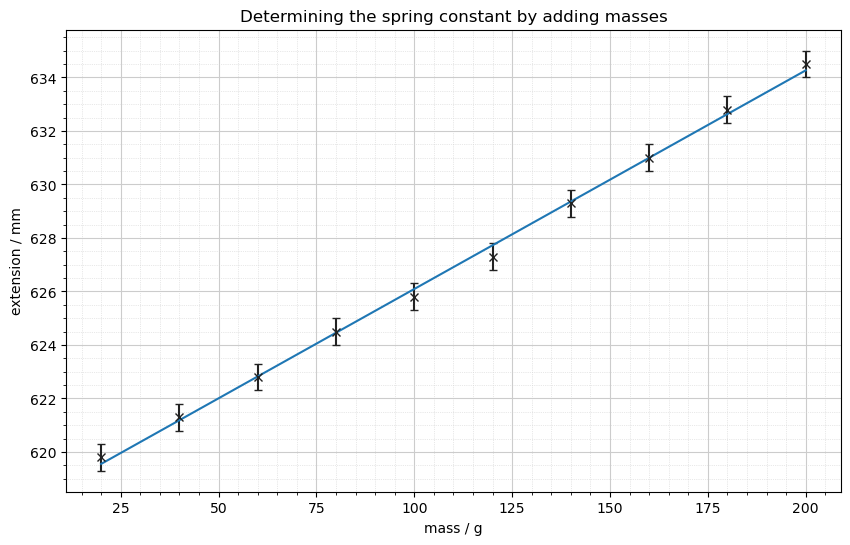

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# load spring data: mass/g, extension/mm, error on extension/mm
mass, ext, d_ext = np.loadtxt('N:\Documents\VSCode\comp\w4\data\spring.csv', delimiter=',', unpack=True)


# plot data with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(mass, ext, yerr=d_ext, fmt="x", capsize=3, color="#222", zorder=2)
plt.xlabel("mass / g")
plt.ylabel("extension / mm")
plt.title("Determining the spring constant by adding masses")

plt.minorticks_on()
plt.grid(which='major', axis='both', color='#ccc')
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='lightgray')
# plt.savefig("graph.png")


# unweighted fit - adapted from PHAS0007 Computing Unit 4: Fitting a straight line to data
line, errors = np.polyfit(mass, ext, 1, cov=True)
m, c = line
d_m, d_c = np.sqrt(np.diag(errors))

print(f'\n\033[1;4;91mFull Precision\033[0m\n\n\033[1mUnweighted Fit\033[0m\nm = {m:20} ± {d_m:<21} mm/g\nc = {c:20} ± {d_c:<21} mm\n')


# weighted fit
wLine, wErrors = np.polyfit(mass, ext, 1, w=1/d_ext, cov='unscaled')
wm, wc = wLine
d_wm, d_wc = np.sqrt(np.diag(wErrors))

print(f'\033[1mWeighted Fit\033[0m\nm = {wm:20} ± {d_wm:<21} mm/g\nc = {wc:20} ± {d_wc:<21} mm\n\n')


# plot straight line (unweighted and weighted lines are the same)
plt.plot(mass, m*mass + c)


# display appropriate precision results
print(f'\033[1;4;92mAppropriate Precision\033[0m\n\n\033[1mUnweighted Fit\033[0m\nm = {m:.4f} ± {d_m:.4f} mm/g\nc = {c:.2f} ± {d_c:<6.2f} mm\n')
print(f'\033[1mWeighted Fit\033[0m\nm = {wm:.4f} ± {d_wm:.4f} mm/g\nc = {wc:.2f} ± {d_wc:<6.2f} mm\n\n')

### Weighted vs Unweighted Fit

Both weighted and unweighted fits result in the same line as the error in each mass reading is constant (0.5 mm). Hence, values for m and c are the same.

However, the uncertainties of m and c in the weighted fit are greater than that of the unweighted fit so are most likely an overestimate.

### Calculating $k$
The gradient, $\nabla = x/m$

We require $k = mg/x = g/\nabla$

We also need to convert the units of $x$ from `mm` to `m`, and $m$ from `g` to `kg` (however these cancel eachother out: $10^{-3} \times 10^{3} = 1$)

The error in k is $\frac{d}{dx} \left( 9.81\, m^{-1} \right) \cdot \Delta m = \frac{9.81 \, \Delta m}{m^{2}}$


In [5]:
k = (1/m) * (9.81)
d_k = (9.81 * d_m) / (m**2)
print(f'k = {k:2.0f} ± {d_k:.0f} N/m')

k = 120 ± 2 N/m


### Conclusion
The calculated value of k is quite accurate as it has a relatively low uncertainty (~1.5%).
This suggests that the experiment was valid, as seen by the fact that the line of best fit passes through all error bars.